# Description

This notebook calculates and plots the binomial distribution for a given single trial success probability ```p_success``` and a given number of trials ```n_trials```. Assuming there is a known, constant single trial success probability ```p_success``` between 0 (never successful) and 1 (always successful), this tells you how probable it is that you get 0, 1, ..., or ```n_trial``` succcessful results when conducting ```n_trial``` tests.

Note: all probabilities are given as numbers between 0 and 1, where 0 represents "never" and 1 represents 100% certainty.

# Parameters

In [ ]:
n_trials = 10 #number of trials conducted
p_success = 0.5 #probability of success of a single trial



# Evaluation

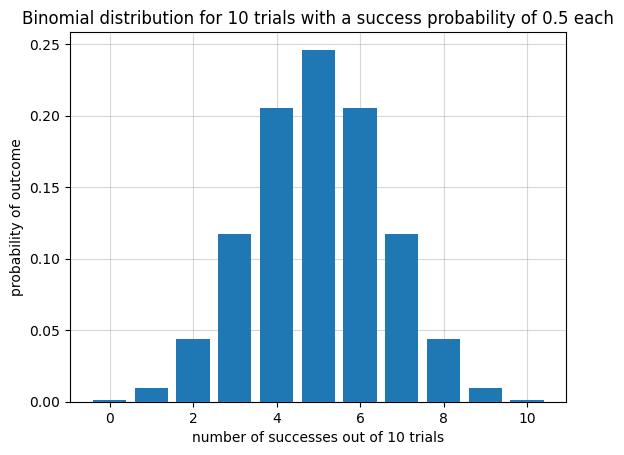

In [ ]:
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc

mp.mp.dps = 50 #use 50 decimal digits precision in mpmath calculations

def binomial_distr(n_successes, p_success, n_trials):
    return mp.binomial(n_trials, n_successes) * mp.mpf(p_success)**n_successes * mp.mpf(1-p_success)**(n_trials-n_successes)

binomial_distr_vectorized = np.vectorize(binomial_distr) #create version of binomial distribution that can be evaluated for whole lists of inputs

x = np.arange(0, n_trials+1) #list of all possible outcomes (number of successes x out of n_trials)
P_x = binomial_distr_vectorized(x, p_success, n_trials) #probabilities of each of these outcomes

plt.bar(x, P_x, zorder=3)
plt.gca().set_title('Binomial distribution for {} trials with a success probability of {} each'.format(n_trials, p_success))
plt.gca().set_xlabel('number of successes out of {} trials'.format(n_trials))
plt.gca().set_ylabel('probability of outcome'.format(n_trials))

plt.gca().set_title('Binomial distribution for {} trials with a success probability of {} each'.format(n_trials, p_success))
plt.gca().set_xlabel('number of successes out of {} trials'.format(n_trials))
plt.gca().set_ylabel('probability of outcome'.format(n_trials))
plt.grid(alpha=0.5);

Using the given p_success=0.5, the probability that you get 5 or even more 'too lucky' successes out of 10 trials is 0.623. That number is the sum of the zoomed plot below.


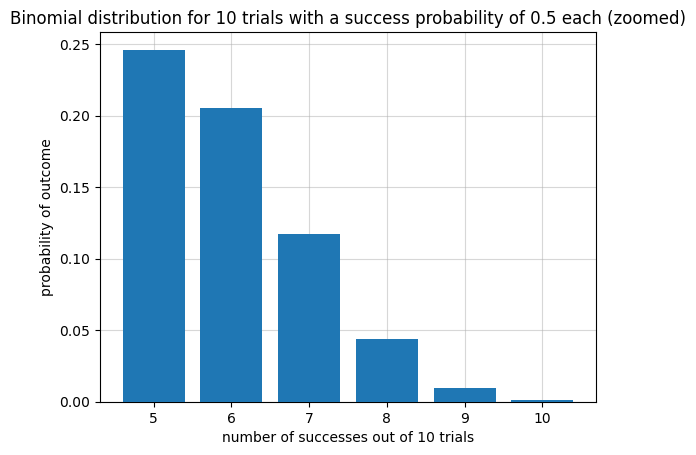

In [ ]:
## zoomed plot

most_frequent = np.argmax(P_x)
n_successes_zoom = most_frequent

plt.bar(x[n_successes_zoom:], P_x[n_successes_zoom:], zorder=3)

plt.gca().set_title('Binomial distribution for {} trials with a success probability of {} each (zoomed)'.format(n_trials, p_success))
plt.gca().set_xlabel('number of successes out of {} trials'.format(n_trials))
plt.gca().set_ylabel('probability of outcome'.format(n_trials))
plt.grid(alpha=0.5);

round_to_digits = 4
prob_to_get_same_or_more_lucky = mp.nstr(np.sum(P_x[n_successes_zoom:]), round_to_digits)
print(f"Using the given {p_success=}, the probability that you get {n_successes_zoom} or even more 'too lucky' successes out of {n_trials} trials is {prob_to_get_same_or_more_lucky}. That number is the sum of the zoomed plot below.")

92